In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

# Assignment(6-6)

## Initializations

In [2]:
house = pd.read_csv("house_features_for_model.csv")
price = pd.read_csv("house_prices_for_model.csv")

X= house
Y= price

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("Eğitim kümesindeki gözlem sayısı : {}".format(X_train.shape[0]))
print("Test kümesindeki gözlem sayısı   : {}".format(X_test.shape[0]))


Eğitim kümesindeki gözlem sayısı : 1103
Test kümesindeki gözlem sayısı   : 276


## Model Train

In [4]:
modell = sm.OLS(y_train, X_train).fit()

modell.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     315.0
Date:                Fri, 24 Apr 2020   Prob (F-statistic):               0.00
Time:                        14:27:58   Log-Likelihood:                -13039.
No. Observations:                1103   AIC:                         2.611e+04
Df Residuals:                    1086   BIC:                         2.620e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     7.907e+04   1.91e+04      4.147      0.000    4.17e+04    1.16e+05
Neighborhood_Crawfor      3.567e+04   5418.485      6.582      0.000     2.5e+04    4.63e+04
Neighborhood_NoRidge      6.342e+04   6558.266      9.670      0.000    5.05e+04    7.63e+04
Neighborhood_NridgHt      2.982e+04   5218.836      5.714      0.000    1.96e+04    4.01e+04
Neighborhood_StoneBr      5.477e+04   7823.646      7.000      0.000    3.94e+04    7.01e+04
Neighborhood_Veenker      2.052e+04   1.14e+04      1.806      0.071   -1774.446    4.28e+04
Condition2_PosN          -1.498e+05   2.43e+04     -6.156      0.000   -1.97e+05   -1.02e+05
Exterior1st_BrkFace       1.686e+04   5523.395      3.053      0.002    6023.583    2.77e+04
Fireplaces                1.097e+04   1791.719      6.122      0.000    7452.668    1.45e+04
GarageArea                  34.2444      9.879      3.466      0.001      14.860      53.629
OverallQual              -4.162e+04   5821.414     -7.150      0.000    -5.3e+04   -3.02e+04
OverallCond               8322.2997   1043.358      7.976      0.000    6275.075    1.04e+04
GarageCars                9123.7944   3053.449      2.988      0.003    3132.467    1.51e+04
TotRmsAbvGrd             -1.335e+05   1.29e+04    -10.368      0.000   -1.59e+05   -1.08e+05
OverallQual * LotArea        0.1245      0.015      8.478      0.000       0.096       0.153
YearBuilt * TotRmsAbvGrd    72.3549      6.614     10.939      0.000      59.376      85.334
OverallQual**2            5015.7520    463.251     10.827      0.000    4106.783    5924.721
==============================================================================
Omnibus:                      289.291   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19408.350
Skew:                          -0.039   Prob(JB):                         0.00
Kurtosis:                      23.550   Cond. No.                     2.54e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Metrics on Test Set

In [5]:
Y_pred_modell = modell.predict(X_train)
Y_pred_modell_test = modell.predict(X_test)

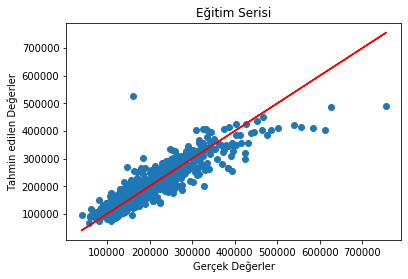

In [6]:
plt.scatter(y_train, Y_pred_modell)
plt.plot(y_train, y_train, color="red")
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin edilen Değerler")
plt.title("Eğitim Serisi")
plt.show()

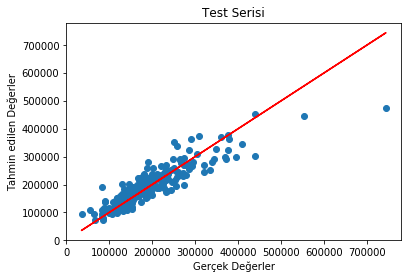

In [7]:
plt.scatter(y_test, Y_pred_modell_test)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin edilen Değerler")
plt.title("Test Serisi")
plt.show()

Maybe we can winsorize or do log transformation for outliners but generally our model looks good.

In [8]:
print("Ortalama Mutlak Hata (MSE)        : {}".format(mean_absolute_error(y_test.iloc[:,0], Y_pred_modell_test)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test.iloc[:,0], Y_pred_modell_test)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test.iloc[:,0], Y_pred_modell_test)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test.iloc[:,0] - Y_pred_modell_test) / y_test.iloc[:,0])) * 100))

Ortalama Mutlak Hata (MSE)        : 24056.685189813266
Ortalama Kare Hata (MSE)          : 1299948266.7487316
Kök Ortalama Kare Hata (RMSE)     : 36054.79533638669
Ortalama Mutlak Yüzde Hata (MAPE) : 13.699051153079298


Ortalama 24056 TL'lik bir hata pek istediğim bir şey değil. Kök ortalama kare hata değeri ortalama mutlak hata değerinden fazla olduğuna göre pahalı evlerde hata oranım daha yüksek ki bu grafikten de çıkarılabiliyor. Bu yüksek değerlerde verimin yetersizliğinden kaynaklanıyor olabilir.

## Model Improvment

In [9]:
del X_train["const"]
del X_test["const"]

poly = PolynomialFeatures()

X_new_test = poly.fit_transform(X_test)
X_new_test = pd.DataFrame(X_new_test)

X_new = poly.fit_transform(X_train)
X_new = pd.DataFrame(X_new)

In [10]:
model = sm.OLS(y_train, np.array(X_new)).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     84.62
Date:                Fri, 24 Apr 2020   Prob (F-statistic):               0.00
Time:                        14:27:58   Log-Likelihood:                -12713.
No. Observations:                1103   AIC:                         2.564e+04
Df Residuals:                     994   BIC:                         2.619e+04
Df Model:                         108                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.875e+05   1.46e+05     -1.286      0.199   -4.74e+05    9.87e+04
x1          8.661e+04   7.88e+04      1.099      0.272   -6.81e+04    2.41e+05
x2          9.455e+05   2.45e+05      3.867      0.000    4.66e+05    1.43e+06
x3          1.095e+04   9046.978      1.210      0.226   -6803.607    2.87e+04
x4          5.692e+05   5.39e+05      1.057      0.291   -4.88e+05    1.63e+06
x5          4.375e+04   5.51e+04      0.794      0.427   -6.43e+04    1.52e+05
x6            -0.1226      0.059     -2.082      0.038      -0.238      -0.007
x7         -8.876e+04   5.32e+04     -1.668      0.096   -1.93e+05    1.57e+04
x8          7.251e+04   3.95e+04      1.837      0.066   -4927.206     1.5e+05
x9          -203.0510    163.478     -1.242      0.215    -523.852     117.750
x10           1.7e+05   8.55e+04      1.989      0.047    2298.316    3.38e+05
x11         1.907e+04   1.84e+04      1.036      0.301   -1.71e+04    5.52e+04
x12         7.262e+04    5.2e+04      1.396      0.163   -2.95e+04    1.75e+05
x13         9.518e+04   1.98e+05      0.482      0.630   -2.93e+05    4.83e+05
x14            1.2527      0.614      2.041      0.041       0.048       2.457
x15          -59.3401    102.391     -0.580      0.562    -260.267     141.587
x16         -2.43e+04   1.07e+04     -2.281      0.023   -4.52e+04   -3398.441
x17         8.636e+04   7.88e+04      1.096      0.273   -6.83e+04    2.41e+05
x18        -8.824e-05      0.001     -0.100      0.920      -0.002       0.002
x19           -0.0004      0.000     -2.391      0.017      -0.001    -7.7e-05
x20        -7.787e-05      0.000     -0.636      0.525      -0.000       0.000
x21            0.0005      0.000      1.536      0.125      -0.000       0.001
x22           -0.0004      0.000     -3.242      0.001      -0.001      -0.000
x23         5499.6900   2.15e+04      0.256      0.798   -3.66e+04    4.76e+04
x24         -1.01e+04   7980.242     -1.266      0.206   -2.58e+04    5560.317
x25          -50.0322     48.957     -1.022      0.307    -146.104      46.039
x26        -7.642e+04   5.43e+04     -1.406      0.160   -1.83e+05    3.02e+04
x27         4933.8459   3899.153      1.265      0.206   -2717.671    1.26e+04
x28         1309.3588   1.56e+04      0.084      0.933   -2.93e+04     3.2e+04
x29        -2.741e+05   7.25e+04     -3.779      0.000   -4.17e+05   -1.32e+05
x30            0.2258      0.172      1.314      0.189      -0.111       0.563
x31          144.5696     38.523      3.753      0.000      68.974     220.165
x32         6935.7867   4296.062      1.614      0.107   -1494.604    1.54e+04
x33         9.455e+05   2.45e+05      3.867      0.000    4.66e+05    1.43e+06
x34         1.721e-05   1.21e-05      1.419      0.156   -6.59e-06     4.1e-05
x35        -3.289e-05   2.31e-05     -1.421      0.156   -7.83e-05    1.25e-05
x3

In [11]:
X_new.columns = model.pvalues.index
X_new_test.columns = model.pvalues.index

for feature in model.pvalues[model.pvalues > 0.5].index:
    del X_new[feature]
    del X_new_test[feature]

In [12]:

model = sm.OLS(y_train, np.array(X_new)).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     104.8
Date:                Fri, 24 Apr 2020   Prob (F-statistic):               0.00
Time:                        14:27:58   Log-Likelihood:                -12719.
No. Observations:                1103   AIC:                         2.562e+04
Df Residuals:                    1014   BIC:                         2.606e+04
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.118e+05   1.16e+05     -1.826      0.068   -4.39e+05    1.58e+04
x1          1.195e+05   7.95e+04      1.503      0.133   -3.65e+04    2.76e+05
x2          9.982e+05   2.36e+05      4.228      0.000    5.35e+05    1.46e+06
x3           1.08e+04   8913.475      1.211      0.226   -6693.894    2.83e+04
x4          5.391e+05      5e+05      1.079      0.281   -4.41e+05    1.52e+06
x5          2.761e+05   4.13e+05      0.669      0.504   -5.34e+05    1.09e+06
x6            -4.0846      6.816     -0.599      0.549     -17.459       9.290
x7         -8.739e+04   4.73e+04     -1.848      0.065    -1.8e+05    5417.860
x8          5.598e+04   3.73e+04      1.501      0.134   -1.72e+04    1.29e+05
x9          -214.7344    156.915     -1.368      0.171    -522.650      93.182
x10          1.49e+05      8e+04      1.863      0.063   -7962.498    3.06e+05
x11         2.402e+04   6596.634      3.641      0.000    1.11e+04     3.7e+04
x12         7.098e+04   4.75e+04      1.493      0.136   -2.23e+04    1.64e+05
x13            0.9998      0.582      1.718      0.086      -0.142       2.142
x14         -2.23e+04   1.04e+04     -2.148      0.032   -4.27e+04   -1928.826
x15          8.91e+04   8.12e+04      1.098      0.273   -7.02e+04    2.48e+05
x16            0.0538      0.082      0.657      0.512      -0.107       0.214
x17            0.0014      0.003      0.408      0.683      -0.005       0.008
x18            0.0026      0.006      0.464      0.643      -0.009       0.014
x19        -9353.2419   7769.974     -1.204      0.229   -2.46e+04    5893.827
x20          -51.9743     28.342     -1.834      0.067    -107.590       3.642
x21        -9.067e+04   5.26e+04     -1.722      0.085   -1.94e+05    1.26e+04
x22         5204.1681   3724.788      1.397      0.163   -2105.007    1.25e+04
x23         -2.83e+05   7.16e+04     -3.953      0.000   -4.24e+05   -1.43e+05
x24            0.1635      0.164      0.996      0.319      -0.158       0.485
x25          150.1125     38.010      3.949      0.000      75.525     224.700
x26         8085.9357   4166.882      1.941      0.053     -90.764    1.63e+04
x27         1.002e+06   2.36e+05      4.245      0.000    5.39e+05    1.47e+06
x28        -1.874e-05   5.39e-05     -0.348      0.728      -0.000     8.7e-05
x29            0.0011      0.002      0.614      0.540      -0.002       0.005
x30         8.924e-05      0.000      0.618      0.537      -0.000       0.000
x31         8.624e+04   3.63e+04      2.377      0.018     1.5e+04    1.57e+05
x32         2.282e+04   1.98e+04      1.154      0.249    -1.6e+04    6.16e+04
x33           76.7956     38.529      1.993      0.047       1.189     152.402
x34        -5.747e+05   1.12e+05     -5.109      0.000   -7.95e+05   -3.54e+05
x35          3.85e+04   1.77e+04      2.171      0.030    3693.948    7.33e+04
x3

In [13]:
X_new.columns = model.pvalues.index
X_new_test.columns = model.pvalues.index

for feature in model.pvalues[model.pvalues > 0.5].index:
    del X_new[feature]
    del X_new_test[feature]

In [14]:
model = sm.OLS(y_train, np.array(X_new)).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     107.6
Date:                Fri, 24 Apr 2020   Prob (F-statistic):               0.00
Time:                        14:27:58   Log-Likelihood:                -12724.
No. Observations:                1103   AIC:                         2.562e+04
Df Residuals:                    1017   BIC:                         2.605e+04
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.165e+05   1.16e+05     -1.861      0.063   -4.45e+05    1.18e+04
x1          9.469e+04   7.62e+04      1.243      0.214   -5.48e+04    2.44e+05
x2          1.054e+06   2.35e+05      4.479      0.000    5.92e+05    1.52e+06
x3          1.166e+04   8927.066      1.306      0.192   -5862.046    2.92e+04
x4           5.68e+05   5.01e+05      1.133      0.257   -4.15e+05    1.55e+06
x5         -7.792e+04   4.43e+04     -1.758      0.079   -1.65e+05    9042.036
x6           5.59e+04   3.64e+04      1.536      0.125   -1.55e+04    1.27e+05
x7          -208.8009    155.943     -1.339      0.181    -514.808      97.206
x8          1.552e+05   8.02e+04      1.936      0.053   -2122.098    3.13e+05
x9          2.447e+04   6597.159      3.709      0.000    1.15e+04    3.74e+04
x10         6.902e+04   4.75e+04      1.454      0.146   -2.42e+04    1.62e+05
x11            0.7577      0.566      1.340      0.181      -0.352       1.868
x12        -2.317e+04   1.04e+04     -2.227      0.026   -4.36e+04   -2756.713
x13         9.488e+04   7.62e+04      1.245      0.213   -5.46e+04    2.44e+05
x14        -8475.0002   7615.053     -1.113      0.266   -2.34e+04    6468.013
x15          -52.8959     28.268     -1.871      0.062    -108.365       2.573
x16        -8.296e+04   5.25e+04     -1.579      0.115   -1.86e+05    2.01e+04
x17         4956.0245   3726.496      1.330      0.184   -2356.475    1.23e+04
x18          -2.8e+05    7.1e+04     -3.943      0.000   -4.19e+05   -1.41e+05
x19            0.1375      0.162      0.849      0.396      -0.181       0.456
x20          148.5268     37.718      3.938      0.000      74.512     222.541
x21         7439.5103   4150.793      1.792      0.073    -705.589    1.56e+04
x22         1.054e+06   2.35e+05      4.479      0.000    5.92e+05    1.52e+06
x23         8.007e+04   3.62e+04      2.209      0.027    8939.252    1.51e+05
x24         1.925e+04   1.97e+04      0.975      0.330   -1.95e+04     5.8e+04
x25           77.3582     38.639      2.002      0.046       1.536     153.180
x26        -5.976e+05   1.12e+05     -5.324      0.000   -8.18e+05   -3.77e+05
x27         3.596e+04   1.77e+04      2.036      0.042    1308.793    7.06e+04
x28         8.635e+05   5.19e+05      1.665      0.096   -1.54e+05    1.88e+06
x29           -0.0579      0.150     -0.385      0.700      -0.353       0.237
x30         -431.5687    260.775     -1.655      0.098    -943.288      80.151
x31         3.808e+04   6993.913      5.445      0.000    2.44e+04    5.18e+04
x32         1.166e+04   8926.920      1.306      0.192   -5860.115    2.92e+04
x33            0.0023      0.001      2.127      0.034       0.000       0.004
x34         9717.5554      1e+04      0.970      0.332   -9939.344    2.94e+04
x35          -74.9026     29.564     -2.534      0.011    -132.916     -16.889
x3

In [15]:
X_new.columns = model.pvalues.index
X_new_test.columns = model.pvalues.index

for feature in model.pvalues[model.pvalues > 0.4].index:
    del X_new[feature]
    del X_new_test[feature]

In [16]:
model = sm.OLS(y_train, np.array(X_new)).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     113.9
Date:                Fri, 24 Apr 2020   Prob (F-statistic):               0.00
Time:                        14:27:59   Log-Likelihood:                -12728.
No. Observations:                1103   AIC:                         2.562e+04
Df Residuals:                    1022   BIC:                         2.602e+04
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.202e+05   1.16e+05     -1.893      0.059   -4.48e+05    8080.752
x1          9.153e+04   7.57e+04      1.208      0.227   -5.71e+04     2.4e+05
x2          1.203e+06    2.2e+05      5.477      0.000    7.72e+05    1.63e+06
x3          1.235e+04   8929.096      1.384      0.167   -5166.483    2.99e+04
x4          6.448e+05   4.98e+05      1.294      0.196   -3.33e+05    1.62e+06
x5           -6.3e+04   4.07e+04     -1.547      0.122   -1.43e+05    1.69e+04
x6          5.514e+04   3.44e+04      1.604      0.109   -1.23e+04    1.23e+05
x7          -148.9813    150.939     -0.987      0.324    -445.166     147.204
x8          1.582e+05   7.99e+04      1.981      0.048    1490.042    3.15e+05
x9          2.319e+04   6486.877      3.575      0.000    1.05e+04    3.59e+04
x10         7.058e+04   4.71e+04      1.497      0.135   -2.19e+04    1.63e+05
x11            0.4186      0.140      2.990      0.003       0.144       0.693
x12        -2.309e+04   1.04e+04     -2.227      0.026   -4.34e+04   -2740.170
x13         9.151e+04   7.58e+04      1.208      0.227   -5.72e+04     2.4e+05
x14        -8612.4776   7618.063     -1.131      0.259   -2.36e+04    6336.354
x15          -58.3276     27.956     -2.086      0.037    -113.185      -3.470
x16        -7.821e+04   5.23e+04     -1.496      0.135   -1.81e+05    2.44e+04
x17         3928.4013   3581.989      1.097      0.273   -3100.493     1.1e+04
x18        -2.792e+05   7.08e+04     -3.943      0.000   -4.18e+05    -1.4e+05
x19            0.1470      0.160      0.918      0.359      -0.167       0.461
x20          148.3302     37.587      3.946      0.000      74.574     222.087
x21         6978.6585   4125.731      1.691      0.091   -1117.213    1.51e+04
x22         1.203e+06    2.2e+05      5.477      0.000    7.72e+05    1.63e+06
x23         7.649e+04   3.53e+04      2.167      0.030    7233.924    1.46e+05
x24         1.144e+04   1.87e+04      0.611      0.542   -2.53e+04    4.82e+04
x25           75.8893     38.620      1.965      0.050       0.106     151.672
x26        -6.611e+05   1.05e+05     -6.312      0.000   -8.67e+05   -4.56e+05
x27         2.693e+04   1.32e+04      2.035      0.042     965.143    5.29e+04
x28         1.039e+06   4.95e+05      2.100      0.036    6.82e+04    2.01e+06
x29         -519.8825    248.884     -2.089      0.037   -1008.265     -31.500
x30         4.214e+04   6428.658      6.555      0.000    2.95e+04    5.48e+04
x31         1.235e+04   8928.999      1.384      0.167   -5167.619    2.99e+04
x32            0.0017      0.001      1.668      0.096      -0.000       0.004
x33         1.017e+04   9954.012      1.022      0.307   -9362.254    2.97e+04
x34          -76.1327     29.581     -2.574      0.010    -134.179     -18.086
x35         -1.05e+05   6.19e+04     -1.697      0.090   -2.26e+05    1.64e+04
x3

In [17]:
X_new.columns = model.pvalues.index
X_new_test.columns = model.pvalues.index

for feature in model.pvalues[model.pvalues > 0.2].index:
    del X_new[feature]
    del X_new_test[feature]

In [18]:
model = sm.OLS(y_train, np.array(X_new)).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     131.1
Date:                Fri, 24 Apr 2020   Prob (F-statistic):               0.00
Time:                        14:27:59   Log-Likelihood:                -12737.
No. Observations:                1103   AIC:                         2.561e+04
Df Residuals:                    1033   BIC:                         2.597e+04
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.271e+05   1.14e+05     -1.983      0.048   -4.52e+05   -2381.347
x1          1.258e+06      2e+05      6.289      0.000    8.66e+05    1.65e+06
x2           1.25e+04   8892.271      1.406      0.160   -4948.183    2.99e+04
x3          6.828e+05   4.86e+05      1.406      0.160    -2.7e+05    1.64e+06
x4         -1.262e+04   1.25e+04     -1.007      0.314   -3.72e+04     1.2e+04
x5          6.158e+04   3.22e+04      1.914      0.056   -1536.944    1.25e+05
x6          1.718e+05   7.88e+04      2.179      0.030    1.71e+04    3.26e+05
x7          2.159e+04   6259.332      3.449      0.001    9306.755    3.39e+04
x8          6940.3037   3.22e+04      0.216      0.829   -5.62e+04    7.01e+04
x9             0.5253      0.135      3.902      0.000       0.261       0.790
x10        -2.513e+04   1.02e+04     -2.458      0.014   -4.52e+04   -5065.114
x11          -41.9103     25.443     -1.647      0.100     -91.837       8.017
x12        -9855.4712   7664.784     -1.286      0.199   -2.49e+04    5184.852
x13        -2.704e+05   6.78e+04     -3.989      0.000   -4.03e+05   -1.37e+05
x14          143.5765     35.957      3.993      0.000      73.019     214.134
x15         1400.6342    813.589      1.722      0.085    -195.842    2997.110
x16         1.258e+06      2e+05      6.288      0.000    8.66e+05    1.65e+06
x17         7.249e+04   3.52e+04      2.062      0.039    3504.326    1.41e+05
x18           78.7991     38.048      2.071      0.039       4.138     153.460
x19        -6.857e+05   9.67e+04     -7.094      0.000   -8.75e+05   -4.96e+05
x20         2.699e+04   1.31e+04      2.059      0.040    1271.929    5.27e+04
x21         1.101e+06   4.95e+05      2.226      0.026     1.3e+05    2.07e+06
x22         -551.3987    248.677     -2.217      0.027   -1039.369     -63.429
x23         4.383e+04   5865.772      7.472      0.000    3.23e+04    5.53e+04
x24         1.247e+04   8892.038      1.402      0.161   -4982.865    2.99e+04
x25            0.0017      0.001      1.815      0.070      -0.000       0.004
x26          -68.7853     27.767     -2.477      0.013    -123.271     -14.299
x27        -1.065e+05   6.17e+04     -1.727      0.084   -2.27e+05    1.45e+04
x28         6.233e+04   4.45e+04      1.402      0.161   -2.49e+04     1.5e+05
x29        -2.138e+06   5.02e+05     -4.257      0.000   -3.12e+06   -1.15e+06
x30         1072.0098    250.210      4.284      0.000     581.032    1562.988
x31         7713.0132   3850.908      2.003      0.045     156.518    1.53e+04
x32         6.828e+05   4.86e+05      1.406      0.160    -2.7e+05    1.64e+06
x33           59.2333     55.364      1.070      0.285     -49.406     167.873
x34        -3.767e+05   2.43e+05     -1.553      0.121   -8.53e+05    9.92e+04
x35         1.463e+04   8801.842      1.662      0.097   -2643.520    3.19e+04
x3

In [19]:
X_new.columns = model.pvalues.index
X_new_test.columns = model.pvalues.index

for feature in model.pvalues[model.pvalues > 0.3].index:
    del X_new[feature]
    del X_new_test[feature]

In [20]:
model = sm.OLS(y_train, np.array(X_new)).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     138.9
Date:                Fri, 24 Apr 2020   Prob (F-statistic):               0.00
Time:                        14:27:59   Log-Likelihood:                -12740.
No. Observations:                1103   AIC:                         2.561e+04
Df Residuals:                    1037   BIC:                         2.594e+04
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.364e+05   1.09e+05     -2.177      0.030   -4.49e+05   -2.33e+04
x1          1.243e+06      2e+05      6.226      0.000    8.51e+05    1.64e+06
x2          1.308e+04   8869.588      1.475      0.140   -4321.158    3.05e+04
x3          7.199e+05   4.85e+05      1.484      0.138   -2.32e+05    1.67e+06
x4          5.954e+04   3.19e+04      1.865      0.063   -3121.214    1.22e+05
x5          1.775e+05   7.79e+04      2.279      0.023    2.46e+04     3.3e+05
x6          2.263e+04   6237.793      3.628      0.000    1.04e+04    3.49e+04
x7             0.5107      0.132      3.864      0.000       0.251       0.770
x8         -2.531e+04   1.02e+04     -2.485      0.013   -4.53e+04   -5321.561
x9           -43.9634     25.210     -1.744      0.081     -93.433       5.506
x10         -1.06e+04   7534.133     -1.407      0.160   -2.54e+04    4179.874
x11        -2.722e+05   6.75e+04     -4.035      0.000   -4.05e+05    -1.4e+05
x12          144.6428     35.782      4.042      0.000      74.430     214.856
x13         1486.8203    788.925      1.885      0.060     -61.250    3034.891
x14         1.243e+06      2e+05      6.225      0.000    8.51e+05    1.63e+06
x15         8.684e+04   3.32e+04      2.617      0.009    2.17e+04    1.52e+05
x16           78.3312     37.825      2.071      0.039       4.109     152.553
x17        -6.749e+05   9.64e+04     -7.003      0.000   -8.64e+05   -4.86e+05
x18         2.559e+04   1.31e+04      1.956      0.051     -86.374    5.13e+04
x19         1.143e+06   4.95e+05      2.308      0.021    1.71e+05    2.12e+06
x20         -573.3572    249.027     -2.302      0.022   -1062.011     -84.703
x21         4.322e+04   5846.774      7.391      0.000    3.17e+04    5.47e+04
x22          1.31e+04   8869.467      1.477      0.140   -4300.244    3.05e+04
x23            0.0020      0.001      2.184      0.029       0.000       0.004
x24          -62.4615     27.108     -2.304      0.021    -115.655      -9.268
x25        -1.104e+05   6.15e+04     -1.796      0.073   -2.31e+05    1.02e+04
x26         6.552e+04   4.43e+04      1.477      0.140   -2.15e+04    1.53e+05
x27        -2.128e+06   4.98e+05     -4.275      0.000   -3.11e+06   -1.15e+06
x28         1066.9627    248.115      4.300      0.000     580.098    1553.828
x29         7955.6699   3840.469      2.072      0.039     419.694    1.55e+04
x30         7.199e+05   4.85e+05      1.484      0.138   -2.32e+05    1.67e+06
x31           62.5406     55.252      1.132      0.258     -45.878     170.959
x32        -3.937e+05   2.42e+05     -1.625      0.105   -8.69e+05    8.18e+04
x33         1.415e+04   8795.480      1.609      0.108   -3107.860    3.14e+04
x34        -8.374e+05   4.04e+05     -2.073      0.038   -1.63e+06   -4.47e+04
x35            0.4284      0.154      2.781      0.006       0.126       0.731
x3

In [21]:
X_new.columns = model.pvalues.index
X_new_test.columns = model.pvalues.index

for feature in model.pvalues[model.pvalues > 0.1].index:
    del X_new[feature]
    del X_new_test[feature]

In [22]:
model = sm.OLS(y_train, np.array(X_new)).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     156.6
Date:                Fri, 24 Apr 2020   Prob (F-statistic):               0.00
Time:                        14:27:59   Log-Likelihood:                -12749.
No. Observations:                1103   AIC:                         2.561e+04
Df Residuals:                    1045   BIC:                         2.591e+04
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.921e+05   1.03e+05     -1.866      0.062   -3.94e+05    9953.695
x1           1.19e+06   1.96e+05      6.066      0.000    8.05e+05    1.58e+06
x2          4.931e+04   3.17e+04      1.553      0.121    -1.3e+04    1.12e+05
x3          1.419e+05   7.26e+04      1.955      0.051    -524.796    2.84e+05
x4          2.187e+04   6061.454      3.609      0.000    9978.754    3.38e+04
x5             0.5901      0.129      4.586      0.000       0.338       0.843
x6         -1.999e+04   9326.257     -2.143      0.032   -3.83e+04   -1688.776
x7           -40.9665     25.152     -1.629      0.104     -90.321       8.389
x8         -2.489e+05   6.55e+04     -3.803      0.000   -3.77e+05   -1.21e+05
x9           130.7088     34.452      3.794      0.000      63.106     198.311
x10          472.1021    340.923      1.385      0.166    -196.869    1141.073
x11          1.19e+06   1.96e+05      6.067      0.000    8.05e+05    1.58e+06
x12         1.057e+05   2.96e+04      3.567      0.000    4.76e+04    1.64e+05
x13           75.6905     37.926      1.996      0.046       1.271     150.110
x14        -6.532e+05   9.43e+04     -6.928      0.000   -8.38e+05   -4.68e+05
x15         3.069e+04   1.29e+04      2.374      0.018    5324.290    5.61e+04
x16         1.121e+06      5e+05      2.243      0.025    1.41e+05     2.1e+06
x17         -562.1810    251.209     -2.238      0.025   -1055.112     -69.250
x18         4.181e+04   5693.279      7.343      0.000    3.06e+04     5.3e+04
x19            0.0022      0.001      2.386      0.017       0.000       0.004
x20          -72.7423     26.531     -2.742      0.006    -124.802     -20.682
x21        -1.967e+04   6193.843     -3.175      0.002   -3.18e+04   -7513.802
x22        -2.135e+06   4.96e+05     -4.303      0.000   -3.11e+06   -1.16e+06
x23         1069.9539    247.239      4.328      0.000     584.812    1555.096
x24         2386.2074    611.108      3.905      0.000    1187.068    3585.347
x25        -8.433e+05   2.78e+05     -3.033      0.002   -1.39e+06   -2.98e+05
x26            0.4677      0.132      3.544      0.000       0.209       0.727
x27          422.0518    138.095      3.056      0.002     151.078     693.026
x28          298.8766    492.706      0.607      0.544    -667.930    1265.683
x29         4785.0901   4521.148      1.058      0.290   -4086.473    1.37e+04
x30            0.0013      0.001      2.227      0.026       0.000       0.002
x31            0.0012      0.001      2.182      0.029       0.000       0.002
x32            1.8163      0.810      2.241      0.025       0.226       3.407
x33            0.0128      0.006      2.240      0.025       0.002       0.024
x34            0.0064      0.003      2.241      0.025       0.001       0.012
x35            0.0038      0.002      2.241      0.025       0.000       0.007
x3

In [23]:
X_new.columns = model.pvalues.index
X_new_test.columns = model.pvalues.index

for feature in model.pvalues[model.pvalues > 0.1].index:
    del X_new[feature]
    del X_new_test[feature]

In [24]:
model = sm.OLS(y_train, np.array(X_new)).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     171.1
Date:                Fri, 24 Apr 2020   Prob (F-statistic):               0.00
Time:                        14:27:59   Log-Likelihood:                -12753.
No. Observations:                1103   AIC:                         2.561e+04
Df Residuals:                    1050   BIC:                         2.588e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -2.11e+05   1.02e+05     -2.060      0.040   -4.12e+05   -9985.205
x1           1.21e+06   1.96e+05      6.178      0.000    8.25e+05    1.59e+06
x2          1.592e+05    7.2e+04      2.212      0.027     1.8e+04       3e+05
x3          2.114e+04   6035.558      3.502      0.000    9295.850     3.3e+04
x4             0.5927      0.128      4.634      0.000       0.342       0.844
x5         -2.225e+04   9247.891     -2.406      0.016   -4.04e+04   -4106.990
x6         -2.449e+05   5.26e+04     -4.654      0.000   -3.48e+05   -1.42e+05
x7           128.6147     27.134      4.740      0.000      75.371     181.858
x8          1.212e+06   1.96e+05      6.189      0.000    8.28e+05     1.6e+06
x9          1.044e+05   2.97e+04      3.519      0.000    4.62e+04    1.63e+05
x10           74.5148     37.906      1.966      0.050       0.135     148.895
x11        -6.673e+05   9.38e+04     -7.111      0.000   -8.51e+05   -4.83e+05
x12         3.215e+04   1.28e+04      2.513      0.012    7046.022    5.73e+04
x13         1.102e+06      5e+05      2.204      0.028    1.21e+05    2.08e+06
x14         -552.3791    251.365     -2.198      0.028   -1045.613     -59.145
x15         4.273e+04   5655.984      7.554      0.000    3.16e+04    5.38e+04
x16            0.2140      0.069      3.082      0.002       0.078       0.350
x17          -78.7701     26.347     -2.990      0.003    -130.469     -27.071
x18        -2.052e+04   6163.961     -3.329      0.001   -3.26e+04   -8424.316
x19        -2.139e+06   4.97e+05     -4.307      0.000   -3.11e+06   -1.16e+06
x20         1072.9778    247.546      4.334      0.000     587.238    1558.718
x21         2360.1510    610.426      3.866      0.000    1162.357    3557.945
x22        -8.068e+05   2.56e+05     -3.155      0.002   -1.31e+06   -3.05e+05
x23            0.4469      0.121      3.697      0.000       0.210       0.684
x24          405.2654    127.933      3.168      0.002     154.231     656.300
x25            0.0012      0.001      2.147      0.032       0.000       0.002
x26            0.0012      0.001      2.099      0.036    7.81e-05       0.002
x27            1.7093      0.809      2.112      0.035       0.121       3.297
x28            0.0121      0.006      2.120      0.034       0.001       0.023
x29            0.0059      0.003      2.066      0.039       0.000       0.012
x30            0.0036      0.002      2.084      0.037       0.000       0.007
x31            0.0055      0.003      2.084      0.037       0.000       0.011
x32           -1.0236      0.337     -3.035      0.002      -1.685      -0.362
x33           11.2398      5.328      2.110      0.035       0.785      21.694
x34            0.1206      0.057      2.112      0.035       0.009       0.233
x35            0.2521      0.040      6.303      0.000       0.174       0.331
x3

## Comparison

In [25]:
modell.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     315.0
Date:                Fri, 24 Apr 2020   Prob (F-statistic):               0.00
Time:                        14:27:59   Log-Likelihood:                -13039.
No. Observations:                1103   AIC:                         2.611e+04
Df Residuals:                    1086   BIC:                         2.620e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     7.907e+04   1.91e+04      4.147      0.000    4.17e+04    1.16e+05
Neighborhood_Crawfor      3.567e+04   5418.485      6.582      0.000     2.5e+04    4.63e+04
Neighborhood_NoRidge      6.342e+04   6558.266      9.670      0.000    5.05e+04    7.63e+04
Neighborhood_NridgHt      2.982e+04   5218.836      5.714      0.000    1.96e+04    4.01e+04
Neighborhood_StoneBr      5.477e+04   7823.646      7.000      0.000    3.94e+04    7.01e+04
Neighborhood_Veenker      2.052e+04   1.14e+04      1.806      0.071   -1774.446    4.28e+04
Condition2_PosN          -1.498e+05   2.43e+04     -6.156      0.000   -1.97e+05   -1.02e+05
Exterior1st_BrkFace       1.686e+04   5523.395      3.053      0.002    6023.583    2.77e+04
Fireplaces                1.097e+04   1791.719      6.122      0.000    7452.668    1.45e+04
GarageArea                  34.2444      9.879      3.466      0.001      14.860      53.629
OverallQual              -4.162e+04   5821.414     -7.150      0.000    -5.3e+04   -3.02e+04
OverallCond               8322.2997   1043.358      7.976      0.000    6275.075    1.04e+04
GarageCars                9123.7944   3053.449      2.988      0.003    3132.467    1.51e+04
TotRmsAbvGrd             -1.335e+05   1.29e+04    -10.368      0.000   -1.59e+05   -1.08e+05
OverallQual * LotArea        0.1245      0.015      8.478      0.000       0.096       0.153
YearBuilt * TotRmsAbvGrd    72.3549      6.614     10.939      0.000      59.376      85.334
OverallQual**2            5015.7520    463.251     10.827      0.000    4106.783    5924.721
==============================================================================
Omnibus:                      289.291   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19408.350
Skew:                          -0.039   Prob(JB):                         0.00
Kurtosis:                      23.550   Cond. No.                     2.54e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     171.1
Date:                Fri, 24 Apr 2020   Prob (F-statistic):               0.00
Time:                        14:27:59   Log-Likelihood:                -12753.
No. Observations:                1103   AIC:                         2.561e+04
Df Residuals:                    1050   BIC:                         2.588e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -2.11e+05   1.02e+05     -2.060      0.040   -4.12e+05   -9985.205
x1           1.21e+06   1.96e+05      6.178      0.000    8.25e+05    1.59e+06
x2          1.592e+05    7.2e+04      2.212      0.027     1.8e+04       3e+05
x3          2.114e+04   6035.558      3.502      0.000    9295.850     3.3e+04
x4             0.5927      0.128      4.634      0.000       0.342       0.844
x5         -2.225e+04   9247.891     -2.406      0.016   -4.04e+04   -4106.990
x6         -2.449e+05   5.26e+04     -4.654      0.000   -3.48e+05   -1.42e+05
x7           128.6147     27.134      4.740      0.000      75.371     181.858
x8          1.212e+06   1.96e+05      6.189      0.000    8.28e+05     1.6e+06
x9          1.044e+05   2.97e+04      3.519      0.000    4.62e+04    1.63e+05
x10           74.5148     37.906      1.966      0.050       0.135     148.895
x11        -6.673e+05   9.38e+04     -7.111      0.000   -8.51e+05   -4.83e+05
x12         3.215e+04   1.28e+04      2.513      0.012    7046.022    5.73e+04
x13         1.102e+06      5e+05      2.204      0.028    1.21e+05    2.08e+06
x14         -552.3791    251.365     -2.198      0.028   -1045.613     -59.145
x15         4.273e+04   5655.984      7.554      0.000    3.16e+04    5.38e+04
x16            0.2140      0.069      3.082      0.002       0.078       0.350
x17          -78.7701     26.347     -2.990      0.003    -130.469     -27.071
x18        -2.052e+04   6163.961     -3.329      0.001   -3.26e+04   -8424.316
x19        -2.139e+06   4.97e+05     -4.307      0.000   -3.11e+06   -1.16e+06
x20         1072.9778    247.546      4.334      0.000     587.238    1558.718
x21         2360.1510    610.426      3.866      0.000    1162.357    3557.945
x22        -8.068e+05   2.56e+05     -3.155      0.002   -1.31e+06   -3.05e+05
x23            0.4469      0.121      3.697      0.000       0.210       0.684
x24          405.2654    127.933      3.168      0.002     154.231     656.300
x25            0.0012      0.001      2.147      0.032       0.000       0.002
x26            0.0012      0.001      2.099      0.036    7.81e-05       0.002
x27            1.7093      0.809      2.112      0.035       0.121       3.297
x28            0.0121      0.006      2.120      0.034       0.001       0.023
x29            0.0059      0.003      2.066      0.039       0.000       0.012
x30            0.0036      0.002      2.084      0.037       0.000       0.007
x31            0.0055      0.003      2.084      0.037       0.000       0.011
x32           -1.0236      0.337     -3.035      0.002      -1.685      -0.362
x33           11.2398      5.328      2.110      0.035       0.785      21.694
x34            0.1206      0.057      2.112      0.035       0.009       0.233
x35            0.2521      0.040      6.303      0.000       0.174       0.331
x3

AIC ve BIC değerlerimiz düştü. R-kare değerimiz yükseldi. P değerlerimiz düşük. Modelimiz gelişti.

In [27]:
Y_pred_model = model.predict(X_new)
Y_pred_model_test = model.predict(X_new_test)


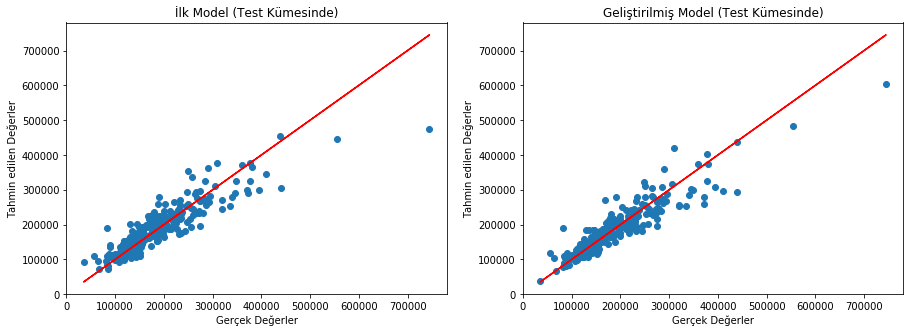

In [30]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(y_test, Y_pred_modell_test)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin edilen Değerler")
plt.title("İlk Model (Test Kümesinde)")
plt.subplot(1,2,2)
plt.scatter(y_test, Y_pred_model_test)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin edilen Değerler")
plt.title("Geliştirilmiş Model (Test Kümesinde)")
plt.show()

In [32]:
print("Ortalama Mutlak Hata (MSE)        : {}".format(mean_absolute_error(y_test.iloc[:,0], Y_pred_modell_test)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test.iloc[:,0], Y_pred_modell_test)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test.iloc[:,0], Y_pred_modell_test)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test.iloc[:,0] - Y_pred_modell_test) / y_test.iloc[:,0])) * 100))

Ortalama Mutlak Hata (MSE)        : 24056.685189813266
Ortalama Kare Hata (MSE)          : 1299948266.7487316
Kök Ortalama Kare Hata (RMSE)     : 36054.79533638669
Ortalama Mutlak Yüzde Hata (MAPE) : 13.699051153079298


In [33]:
print("Ortalama Mutlak Hata (MSE)        : {}".format(mean_absolute_error(y_test.iloc[:,0], Y_pred_model_test)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test.iloc[:,0], Y_pred_model_test)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test.iloc[:,0], Y_pred_model_test)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test.iloc[:,0] - Y_pred_model_test) / y_test.iloc[:,0])) * 100))

Ortalama Mutlak Hata (MSE)        : 21951.09019526816
Ortalama Kare Hata (MSE)          : 1046884533.7370163
Kök Ortalama Kare Hata (RMSE)     : 32355.595091684165
Ortalama Mutlak Yüzde Hata (MAPE) : 31.538179159600794


## Exporting Data

In [34]:
X_new.to_csv("house_polynomial(2)_train_features.csv",index=False)
X_new_test.to_csv("house_polynomial(2)_test_features.csv",index=False)

y_test.to_csv("house_test_y.csv",index=False)
y_train.to_csv("house_train_y.csv",index=False)